## Colour ranges
the HSV ranges like H from 0-179, S and V from 0-255

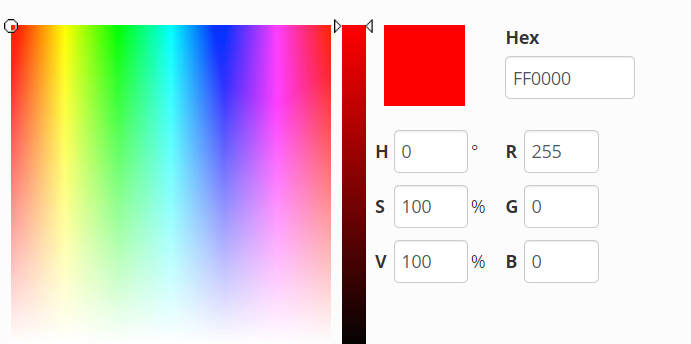

https://alloyui.com/examples/color-picker/hsv.html

## IMAGE SHAPE
(480, 640, 3)

In [22]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np


detect_photos(colour='green')

In [31]:
def detect_photos(colour):

    files = "current.jpg"

    # two ranges because red stretchs over the Hue colour range
    lower_red_1 = (0,100,50)
    upper_red_1 = (5,255,255)

    lower_red_2 = (170,100,50)
    upper_red_2 = (180,255,255)


    for f in files:
        # reading in image to RGB and HSV
        if colour == 'red':
            img_RGB = cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB)
            img_HSV = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)

            # Create two masks
            mask1 = cv2.inRange(img_HSV, lower_red_1, upper_red_1)
            mask2 = cv2.inRange(img_HSV, lower_red_2, upper_red_2)

            # XOR masks
            mask = cv2.bitwise_xor(mask1, mask2)
        elif colour == 'green':
            print('green')

        # bitwise and with image
        result = cv2.bitwise_and(img_HSV, img_HSV, mask=mask)


        # put median blur over the top
        median = cv2.medianBlur(mask,17)

        # find connected components
        ret, labels = cv2.connectedComponents(median)

        # Map component labels to hue val
        label_hue = np.uint8(179*labels/np.max(labels))
        blank_ch = 255*np.ones_like(label_hue)
        labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

        # cvt to BGR for display
        labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

        # set bg label to black
        labeled_img[label_hue==0] = 0

        #########################################################
        ## Finding Centers!
        ret,thresh = cv2.threshold(median,127,255,0)

        # find contours in the binary image
        contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        for c in contours:
            # calculate moments for each contour
            M = cv2.moments(c)

            # calculate x,y coordinate of center
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.circle(labeled_img, (cX, cY), 5, (255, 255, 255), -1)

        # print out figures
        figure = plt.figure(figsize=(20,20))
        plt.subplot(1, 4, 1)
        # mask
        plt.imshow(mask, cmap="gray")
        plt.subplot(1, 4, 2)
        # median blue
        plt.imshow(median)
        #original image
        plt.subplot(1, 4, 3)
        plt.imshow(img_RGB)
        # final 
        plt.subplot(1, 4, 4)
        plt.imshow(labeled_img)

        plt.show()

In [32]:
plt.imshow(labeled_img)

NameError: name 'labeled_img' is not defined

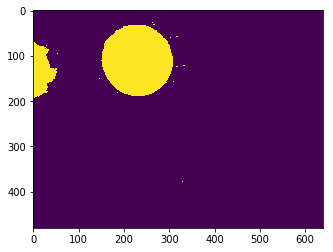

In [80]:
plt.imshow(img_RGB)
plt.show()

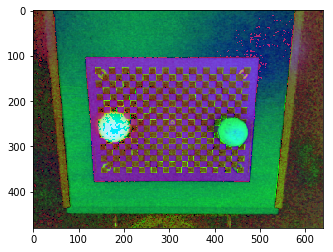

In [55]:
plt.imshow(img_HSV)
plt.show()

In [21]:
# import requests
# import shutil
# from os import path

# dir_path = "saved_images"  # will return 'feed/address'
# #os.makedirs(dir_path)                             # create directory [current_path]/feed/address
# #img_string = "os.path.join(" + dir_path + ", image.jpg)"
# img_string = "current2.jpg"
# print img_string
# #image_url = "http://192.168.1.6:4242/current.jpg?annotations=off"
# image_url = "http://192.168.1.6:4242/current.jpg?type=color"
# #image_url = "http://192.168.1.6:4242/current.jpg?type=edges"

# # Open the url image, set stream to True, this will return the stream content.
# print "here"

#     #rob.set_freedrive(1,timeout = 60)
#     #time.sleep(10);

# resp = requests.get(image_url, stream=True)
# # Open a local file with wb ( write binary ) permission.

# local_file = open(img_string, 'wb')
# # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
# resp.raw.decode_content = True
# # Copy the response stream raw data to local image file.
# shutil.copyfileobj(resp.raw, local_file)
# # Remove the image url response object.
# del resp

# img = cv2.imread(img_string,cv2.COLOR_BGR2RGB)
# cv2.imshow('image',img)

current2.jpg
here


ConnectionError: ('Connection aborted.', error(54, 'Connection reset by peer'))